# El paquete Pandas

## Estadística básica

Usaremos Pandas y Python para hacer análisis estadístico de datos.

In [2]:
# Carga Pandas y Numpy
import pandas as pd
import numpy as np

In [3]:
# Crea opciones por default para Pandas
pd.set_option('display.max_rows', 20)

In [4]:
# Carga pylab in line
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Se cuenta con datos relativos a la venta de automóviles

In [2]:
# Leer el archivo de datos
auto = pd.read_csv('auto.csv')

In [3]:
# Mostrar los primeros renglones de datos
auto.head()

,make,price,mpg,repairs,weight,length,foreign
0,AMC,4099,22,3,2930,186,0
1,AMC,4749,17,3,3350,173,0
2,AMC,3799,22,3,2640,168,0
3,Audi,9690,17,5,2830,189,1
4,Audi,6295,23,3,2070,174,1


Algunas estadísticas básicas sobre el conjunto de datos pueden obtenerse usando el método `describe()`

In [4]:
auto.describe()

,price,mpg,repairs,weight,length,foreign
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,6651.730769,20.923077,3.269231,3099.230769,190.076923,0.269231
std,3371.119809,4.757504,0.777570,695.079409,18.170136,0.452344
min,3299.000000,14.000000,2.000000,2020.000000,163.000000,0.000000
25%,4465.750000,17.250000,3.000000,2642.500000,173.250000,0.000000
50%,5146.500000,21.000000,3.000000,3200.000000,191.000000,0.000000
75%,8053.500000,23.000000,4.000000,3610.000000,203.000000,0.750000
max,15906.000000,35.000000,5.000000,4330.000000,222.000000,1.000000


In [5]:
# Eligir una columna particular
auto.mpg.describe()

count    26.000000
mean     20.923077
std       4.757504
min      14.000000
25%      17.250000
50%      21.000000
75%      23.000000
max      35.000000
Name: mpg, dtype: float64

In [6]:
# Notación equivalenete a la anterior
auto['mpg'].describe()

count    26.000000
mean     20.923077
std       4.757504
min      14.000000
25%      17.250000
50%      21.000000
75%      23.000000
max      35.000000
Name: mpg, dtype: float64

La mediana no está implementada en `describe()`, puede calcularse con `median()`

In [7]:
auto.median()

price      5146.5
mpg          21.0
repairs       3.0
weight     3200.0
length      191.0
foreign       0.0
dtype: float64

In [8]:
auto.mpg.median()

21.0

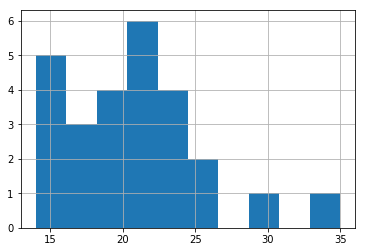

In [10]:
# Gráfica del histograma
auto.mpg.hist()

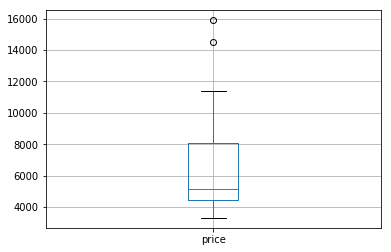

In [11]:
# box plot
auto.boxplot(column='price')

## Agrupamientos

Pandas permite agrupar datos y calcular parámetros estadísticos sobre este segmento de información

In [12]:
# leer datos
titanic = pd.read_csv('titanic.csv')

In [13]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


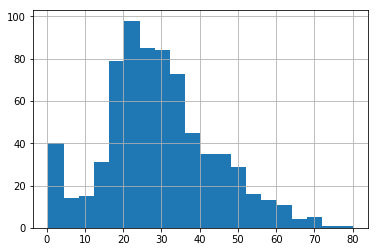

In [15]:
# graficar el histograma
titanic.Age.hist(bins=20)

In [16]:
# agrupar por sexo
grouped = titanic.groupby('Sex')

In [17]:
# estadísticas de la columna 'Age' del objeto agrupado
grouped.Age.describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,261.0,27.915709,14.110146,0.75,18.0,27.0,37.0,63.0
male,453.0,30.726645,14.678201,0.42,21.0,29.0,39.0,80.0


In [18]:
# mediana de la columna 'Age' del objeto agrupado
grouped.Age.median()

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

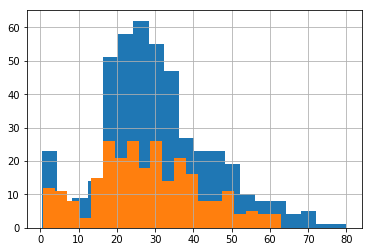

In [19]:
grouped.get_group('male').Age.hist(bins=20)
grouped.get_group('female').Age.hist(bins=20)

female         AxesSubplot(0.1,0.15;0.363636x0.75)
male      AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

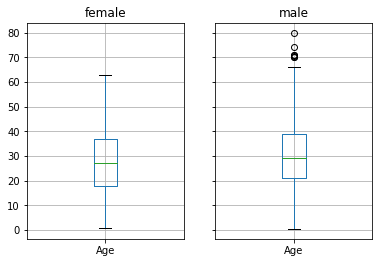

In [20]:
# boxplot del atributo 'Age' del objeto agrupado 
grouped.boxplot(column='Age')